In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize']=(20,10) # set the figure size
plt.style.use('fivethirtyeight') # using the fivethirtyeight matplotlib theme

In [2]:
import glob

files = glob.glob('txt/cnsfails**')
files.sort()

In [9]:
a = []
for f in files:
    df = pd.read_csv(f, delimiter='|', error_bad_lines=False, header=0, skipfooter=2)
    a.append(df)

df = pd.concat(a)

<ipython-input-9-1baea8790b01>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(f, delimiter='|', error_bad_lines=False, header=0, skipfooter=2)
Skipping line 27886: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).
Skipping line 37372: NULL byte detected. This byte cannot be processed in Python's native csv library at the moment, so please pass in engine='c' instead. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).
Skipping line 39539: NULL byte detected. This byte cannot be processed in Python's nati

In [10]:
df
df['PRICE'] = pd.to_numeric(df['PRICE'], errors='coerce')

In [11]:
stonk = df[df['SYMBOL'] == 'GME']
stonk

,SETTLEMENT DATE,CUSIP,SYMBOL,QUANTITY (FAILS),DESCRIPTION,PRICE
9345,20090702,36467W109,GME,67.0,GAMESTOP CORP (HLDG CO) CL A,22.46
16022,20090706,36467W109,GME,182.0,GAMESTOP CORP (HLDG CO) CL A,21.07
22585,20090707,36467W109,GME,86.0,GAMESTOP CORP (HLDG CO) CL A,21.04
29054,20090708,36467W109,GME,106.0,GAMESTOP CORP (HLDG CO) CL A,20.46
35446,20090709,36467W109,GME,724.0,GAMESTOP CORP (HLDG CO) CL A,20.94
...,...,...,...,...,...,...
22785,20210108,36467W109,GME,555658.0,GAMESTOP CORP (HLDG CO) CL A,18.08
28129,20210111,36467W109,GME,703110.0,GAMESTOP CORP (HLDG CO) CL A,17.69
33741,20210112,36467W109,GME,287730.0,GAMESTOP CORP (HLDG CO) CL A,19.94
39283,20210113,36467W109,GME,662524.0,GAMESTOP CORP (HLDG CO) CL A,19.95


<AxesSubplot:label='382bbac1-abb1-4a56-a24a-66998eb1578a', xlabel='SETTLEMENT DATE'>

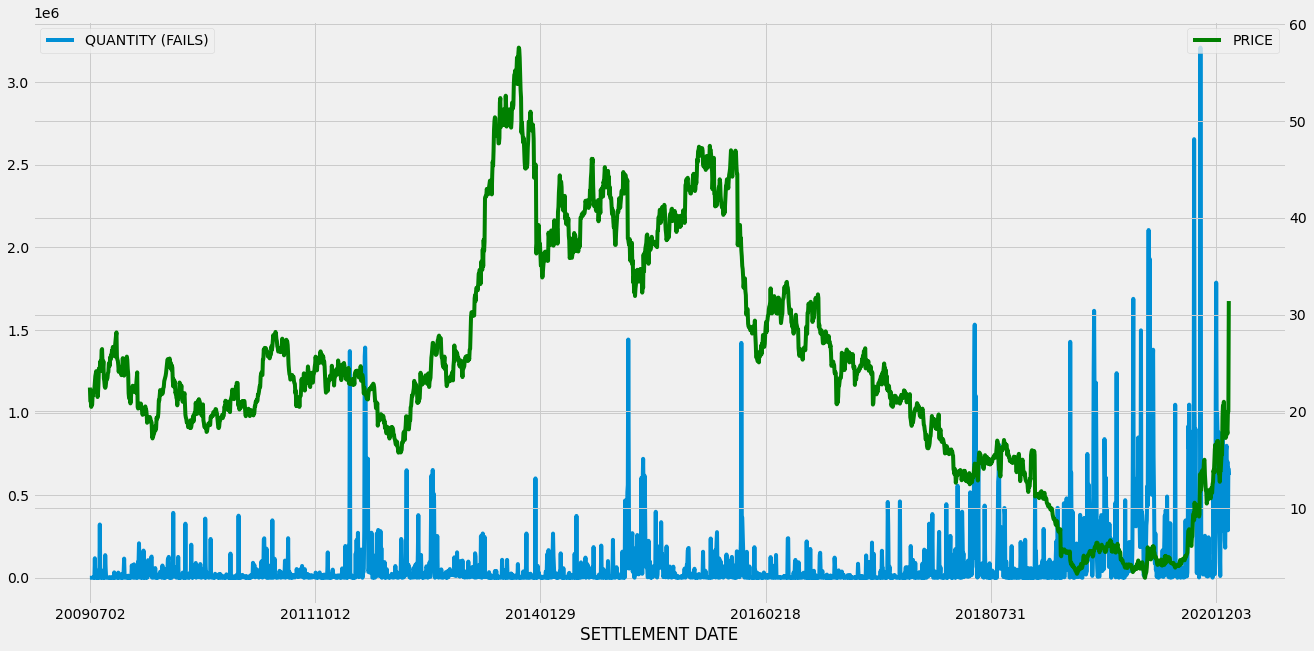

In [12]:
fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()

stonk.plot(x='SETTLEMENT DATE', y='QUANTITY (FAILS)', ax=ax1)
stonk.plot(x='SETTLEMENT DATE', y='PRICE', color='green', ax=ax2)